In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import tkinter as tk
from tkinter import filedialog
import time
import io

In [7]:
df1  = pd.read_csv('1200rpm_1.csv')
df1.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.514532,0.000039,0.679088,0.468711,0.014596,0.234375,0.015186,0.234375,0.020994,0.018309,0.144892,0.135311,0.116586,-1.2,-0.023177,5.780000e-10,1
1,-0.551068,0.468789,0.555852,0.937461,0.014873,0.703125,0.014412,0.703125,0.020695,0.018309,0.143858,0.135311,0.063281,-1.2,-0.023856,-1.140000e-10,1
2,-0.591889,0.937539,0.628330,1.406211,0.016387,1.171875,0.016316,1.171875,0.020610,0.018309,0.143560,0.135311,0.095484,-1.2,-0.016565,-1.140000e-10,1
3,-0.521137,1.406289,0.615120,1.874961,0.016488,1.640625,0.016316,1.640625,0.019657,0.018309,0.140202,0.135311,0.140740,-1.2,0.000706,-1.140000e-10,1
4,-0.562612,1.875039,0.578881,2.343711,0.016652,2.109375,0.018339,2.109375,0.020883,0.018309,0.144509,0.135311,0.117727,-1.2,-0.018211,-1.140000e-10,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   v_min     315 non-null    float64
 1   t_min     315 non-null    float64
 2   v_max     315 non-null    float64
 3   t_max     315 non-null    float64
 4   v_mean    315 non-null    float64
 5   t_mean    315 non-null    float64
 6   v_median  315 non-null    float64
 7   t_median  315 non-null    float64
 8   v_var     315 non-null    float64
 9   t_var     315 non-null    float64
 10  v_std     315 non-null    float64
 11  t_std     315 non-null    float64
 12  v_kur     315 non-null    float64
 13  t_kur     315 non-null    float64
 14  v_skew    315 non-null    float64
 15  t_skew    315 non-null    float64
 16  class     315 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 42.0 KB


In [9]:
def parse_lvm(path:str)->pd.DataFrame:
    with open(path,'rt') as lvm:
        buf=io.StringIO()
        for line in lvm:
            buf.write(line)
            if line[0:3]=='***':
                #Everything before was a header, make a new buffer
                buf.close()
                buf=io.StringIO()

    buf.seek(0)
    return pd.read_csv(buf,sep='\t')

In [12]:
df1 = parse_lvm('1/raw/1_001.lvm')
df1.columns =['time','vibration']
df1.head()

,time,vibration
0,0.000039,-0.184217
1,0.000078,0.086771
2,0.000117,0.257313
3,0.000156,0.074691
4,0.000195,-0.205104


In [13]:
t = df1["time"]
x = df1["vibration"]
#Determine variables
N = np.int(np.prod(t.shape))#length of the array
N2 = 2**(N.bit_length()-1) #last power of 2
Fs = 1/(t[1]-t[0])  #sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)
print("Next power of 2:",N2)

# Samples: 11999
Next power of 2: 8192


Plot Time:


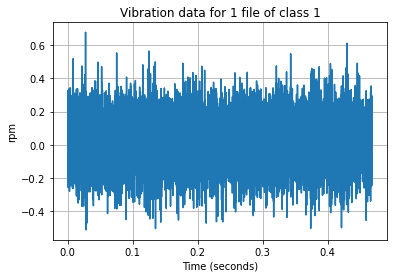

In [19]:
#Plot Data
import time
plt.figure(1)  
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('rpm')
plt.title("Vibration data for 1 file of class 1")
plt.grid()
print("Plot Time:")

## for class 1

In [20]:
df1  = pd.read_csv('1200rpm_1.csv')
df1.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.514532,0.000039,0.679088,0.468711,0.014596,0.234375,0.015186,0.234375,0.020994,0.018309,0.144892,0.135311,0.116586,-1.2,-0.023177,5.780000e-10,1
1,-0.551068,0.468789,0.555852,0.937461,0.014873,0.703125,0.014412,0.703125,0.020695,0.018309,0.143858,0.135311,0.063281,-1.2,-0.023856,-1.140000e-10,1
2,-0.591889,0.937539,0.628330,1.406211,0.016387,1.171875,0.016316,1.171875,0.020610,0.018309,0.143560,0.135311,0.095484,-1.2,-0.016565,-1.140000e-10,1
3,-0.521137,1.406289,0.615120,1.874961,0.016488,1.640625,0.016316,1.640625,0.019657,0.018309,0.140202,0.135311,0.140740,-1.2,0.000706,-1.140000e-10,1
4,-0.562612,1.875039,0.578881,2.343711,0.016652,2.109375,0.018339,2.109375,0.020883,0.018309,0.144509,0.135311,0.117727,-1.2,-0.018211,-1.140000e-10,1


# Samples: 315
Next power of 2: 256
Plot Time:


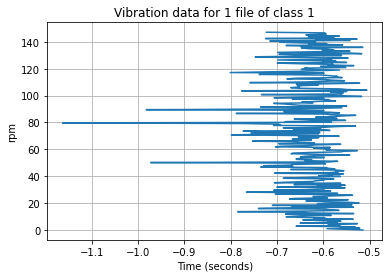

In [21]:
# plotting the minimum of all the samples
t = df1["v_min"]
x = df1["t_min"]
#Determine variables
N = np.int(np.prod(t.shape))#length of the array
N2 = 2**(N.bit_length()-1) #last power of 2
Fs = 1/(t[1]-t[0])  #sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)
print("Next power of 2:",N2)

import time
plt.figure(1)  
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('rpm')
plt.title("Vibration data for 1 file of class 1")
plt.grid()
print("Plot Time:")

In [32]:
cols = list(df1.columns)
cols

['v_min',
 't_min',
 'v_max',
 't_max',
 'v_mean',
 't_mean',
 'v_median',
 't_median',
 'v_var',
 't_var',
 'v_std',
 't_std',
 'v_kur',
 't_kur',
 'v_skew',
 't_skew',
 'class']

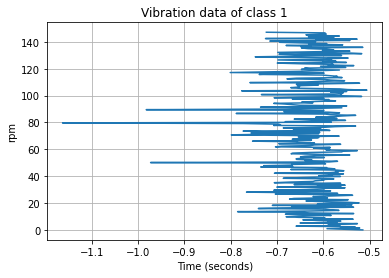

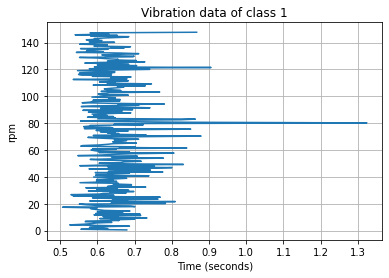

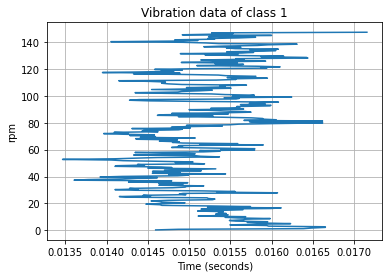

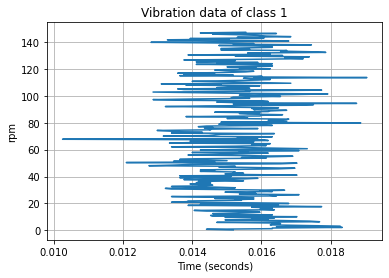

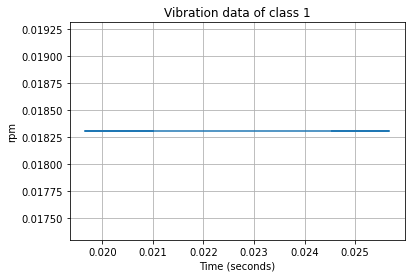

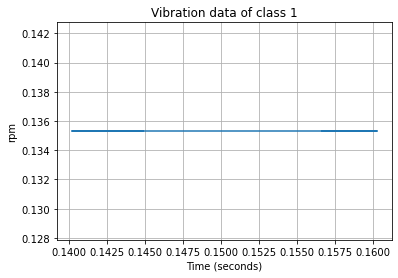

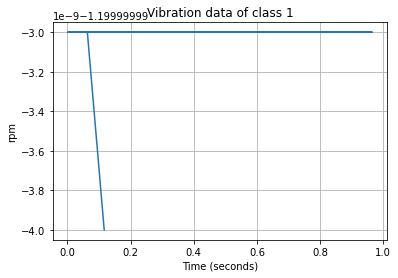

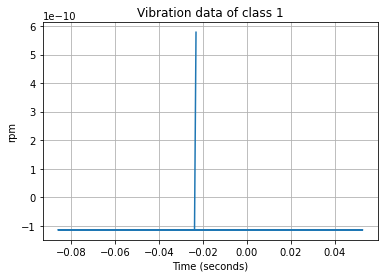

In [47]:
for i in range(0,len(cols)-1,2):
#     print(cols[i],cols[i+1])
    t = df1[cols[i]]
    x = df1[cols[i+1]]
    plt.figure()
    plt.plot(t, x)
    plt.xlabel('Time (seconds)')
    plt.ylabel('rpm')
    plt.title("Vibration data of class 1")
    plt.grid()

# for class 2

In [48]:
df2  = pd.read_csv('1200rpm_2.csv')
df2.head()

,Unnamed: 0,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,0,-0.505785,0.000039,0.501583,0.468711,0.014579,0.234375,0.015959,0.234375,0.013067,0.018309,0.114312,0.135311,0.134972,-1.2,-0.045243,5.783297e-10,2
1,1,-0.402305,0.468789,0.511640,0.937461,0.014869,0.703125,0.016078,0.703125,0.013111,0.018309,0.114504,0.135311,0.019960,-1.2,-0.005005,-1.142886e-10,2
2,2,-0.419145,0.937539,0.518364,1.406211,0.014803,1.171875,0.015602,1.171875,0.012641,0.018309,0.112434,0.135311,0.094821,-1.2,0.000555,-1.142911e-10,2
3,3,-0.406649,1.406289,0.475044,1.874961,0.015017,1.640625,0.015424,1.640625,0.012847,0.018309,0.113345,0.135311,0.062835,-1.2,0.005471,-1.142811e-10,2
4,4,-0.407006,1.875039,0.501881,2.343711,0.015650,2.109375,0.016554,2.109375,0.013224,0.018309,0.114997,0.135311,-0.002552,-1.2,-0.004133,-1.142959e-10,2


In [55]:
df2 = df2.drop(['Unnamed: 0'],axis=1)

In [56]:
df2.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.505785,0.000039,0.501583,0.468711,0.014579,0.234375,0.015959,0.234375,0.013067,0.018309,0.114312,0.135311,0.134972,-1.2,-0.045243,5.783297e-10,2
1,-0.402305,0.468789,0.511640,0.937461,0.014869,0.703125,0.016078,0.703125,0.013111,0.018309,0.114504,0.135311,0.019960,-1.2,-0.005005,-1.142886e-10,2
2,-0.419145,0.937539,0.518364,1.406211,0.014803,1.171875,0.015602,1.171875,0.012641,0.018309,0.112434,0.135311,0.094821,-1.2,0.000555,-1.142911e-10,2
3,-0.406649,1.406289,0.475044,1.874961,0.015017,1.640625,0.015424,1.640625,0.012847,0.018309,0.113345,0.135311,0.062835,-1.2,0.005471,-1.142811e-10,2
4,-0.407006,1.875039,0.501881,2.343711,0.015650,2.109375,0.016554,2.109375,0.013224,0.018309,0.114997,0.135311,-0.002552,-1.2,-0.004133,-1.142959e-10,2


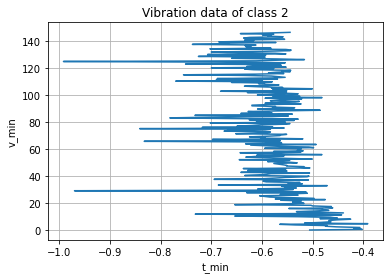

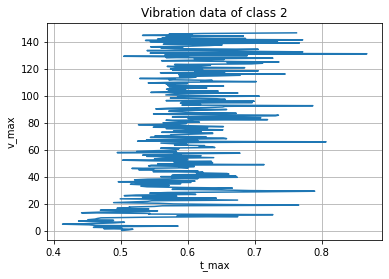

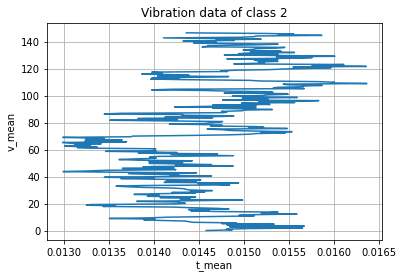

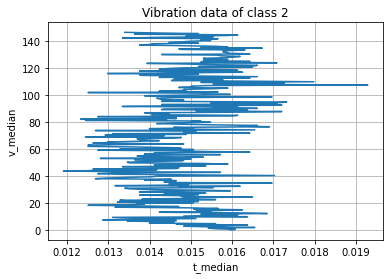

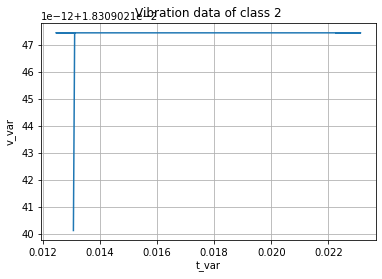

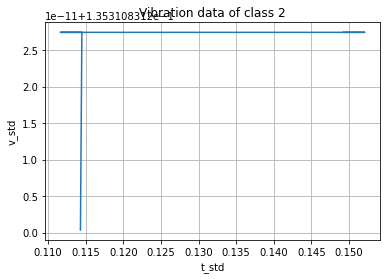

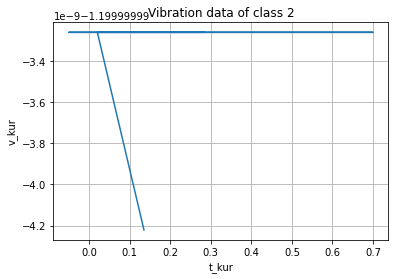

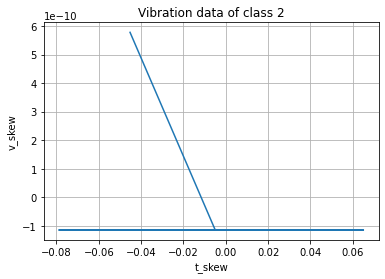

In [63]:
for i in range(0,len(cols)-1,2):
#     print(cols[i],cols[i+1])
    t = df2[cols[i]]
    x = df2[cols[i+1]]
    plt.figure()
    plt.plot(t, x)
    plt.xlabel(cols[i+1])
    plt.ylabel(cols[i])
    plt.title("Vibration data of class 2")
    plt.grid()

# for class 3

In [58]:
df3  = pd.read_csv('1200rpm_3.csv')
df3.head()

,Unnamed: 0,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,0,-0.419740,0.000039,0.444756,0.468711,0.014768,0.234375,0.013698,0.234375,0.013497,0.018309,0.116178,0.135311,0.039524,-1.2,0.048211,5.783297e-10,3
1,1,-0.437234,0.468789,0.452372,0.937461,0.015150,0.703125,0.013579,0.703125,0.013636,0.018309,0.116773,0.135311,-0.027238,-1.2,0.001653,-1.142886e-10,3
2,2,-0.414682,0.937539,0.519256,1.406211,0.015995,1.171875,0.014591,1.171875,0.013525,0.018309,0.116297,0.135311,0.008255,-1.2,0.044689,-1.142911e-10,3
3,3,-0.541666,1.406289,0.529372,1.874961,0.016216,1.640625,0.018339,1.640625,0.013830,0.018309,0.117601,0.135311,0.231576,-1.2,-0.001487,-1.142811e-10,3
4,4,-0.460977,1.875039,0.433152,2.343711,0.016254,2.109375,0.014055,2.109375,0.013548,0.018309,0.116396,0.135311,0.037222,-1.2,-0.023460,-1.142959e-10,3


In [59]:
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.419740,0.000039,0.444756,0.468711,0.014768,0.234375,0.013698,0.234375,0.013497,0.018309,0.116178,0.135311,0.039524,-1.2,0.048211,5.783297e-10,3
1,-0.437234,0.468789,0.452372,0.937461,0.015150,0.703125,0.013579,0.703125,0.013636,0.018309,0.116773,0.135311,-0.027238,-1.2,0.001653,-1.142886e-10,3
2,-0.414682,0.937539,0.519256,1.406211,0.015995,1.171875,0.014591,1.171875,0.013525,0.018309,0.116297,0.135311,0.008255,-1.2,0.044689,-1.142911e-10,3
3,-0.541666,1.406289,0.529372,1.874961,0.016216,1.640625,0.018339,1.640625,0.013830,0.018309,0.117601,0.135311,0.231576,-1.2,-0.001487,-1.142811e-10,3
4,-0.460977,1.875039,0.433152,2.343711,0.016254,2.109375,0.014055,2.109375,0.013548,0.018309,0.116396,0.135311,0.037222,-1.2,-0.023460,-1.142959e-10,3


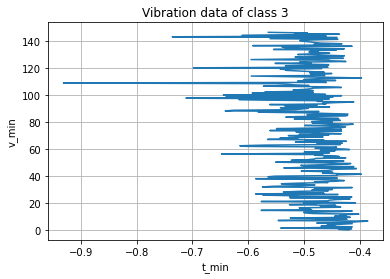

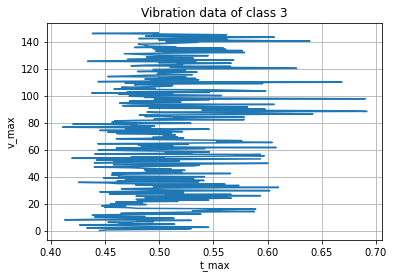

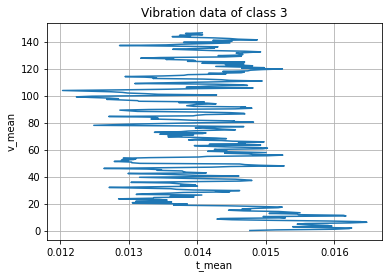

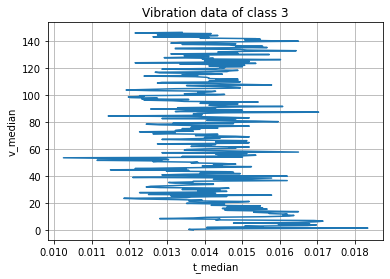

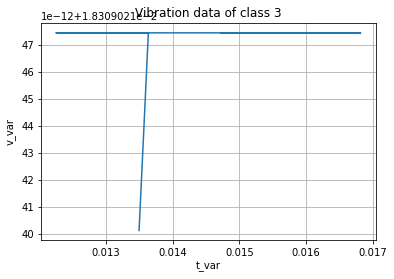

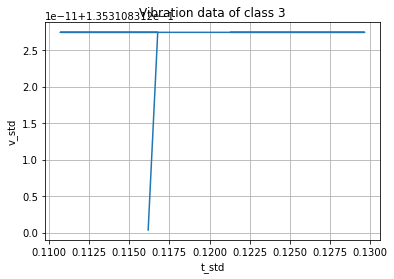

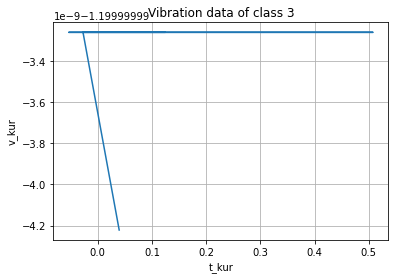

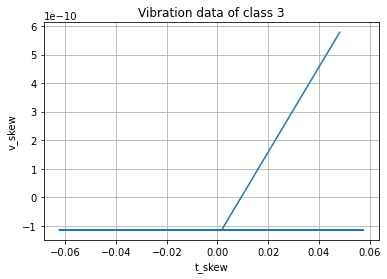

In [62]:
for i in range(0,len(cols)-1,2):
#     print(cols[i],cols[i+1])
    t = df3[cols[i]]
    x = df3[cols[i+1]]
    plt.figure()
    plt.plot(t, x)
    plt.xlabel(cols[i+1])
    plt.ylabel(cols[i])
    plt.title("Vibration data of class 3")
    plt.grid()

# for class 4

In [64]:
df4  = pd.read_csv('1200rpm_4.csv')
df4.head()

,Unnamed: 0,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,0,-0.416586,0.000039,0.472485,0.468711,0.012617,0.234375,0.012567,0.234375,0.013509,0.018309,0.116228,0.135311,0.037371,-1.2,-0.009840,5.783297e-10,4
1,1,-0.507034,0.468789,0.568824,0.937461,0.012956,0.703125,0.012924,0.703125,0.013456,0.018309,0.115999,0.135311,0.025024,-1.2,-0.000883,-1.142886e-10,4
2,2,-0.475377,0.937539,0.448385,1.406211,0.013702,1.171875,0.014829,1.171875,0.013677,0.018309,0.116951,0.135311,0.033577,-1.2,-0.047248,-1.142911e-10,4
3,3,-0.425809,1.406289,0.513187,1.874961,0.014627,1.640625,0.014472,1.640625,0.013934,0.018309,0.118040,0.135311,0.004732,-1.2,-0.003238,-1.142811e-10,4
4,4,-0.500072,1.875039,0.515746,2.343711,0.015101,2.109375,0.015305,2.109375,0.014437,0.018309,0.120156,0.135311,0.136385,-1.2,-0.009206,-1.142959e-10,4


In [65]:
df4 = df4.drop(['Unnamed: 0'],axis=1)
df4.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.416586,0.000039,0.472485,0.468711,0.012617,0.234375,0.012567,0.234375,0.013509,0.018309,0.116228,0.135311,0.037371,-1.2,-0.009840,5.783297e-10,4
1,-0.507034,0.468789,0.568824,0.937461,0.012956,0.703125,0.012924,0.703125,0.013456,0.018309,0.115999,0.135311,0.025024,-1.2,-0.000883,-1.142886e-10,4
2,-0.475377,0.937539,0.448385,1.406211,0.013702,1.171875,0.014829,1.171875,0.013677,0.018309,0.116951,0.135311,0.033577,-1.2,-0.047248,-1.142911e-10,4
3,-0.425809,1.406289,0.513187,1.874961,0.014627,1.640625,0.014472,1.640625,0.013934,0.018309,0.118040,0.135311,0.004732,-1.2,-0.003238,-1.142811e-10,4
4,-0.500072,1.875039,0.515746,2.343711,0.015101,2.109375,0.015305,2.109375,0.014437,0.018309,0.120156,0.135311,0.136385,-1.2,-0.009206,-1.142959e-10,4


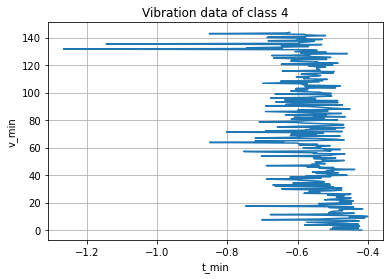

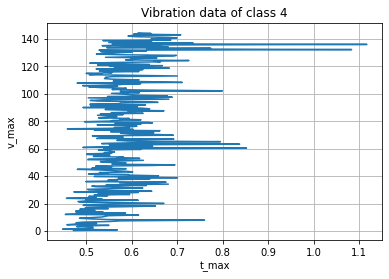

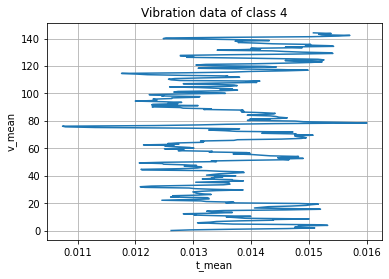

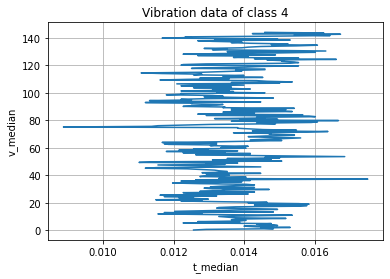

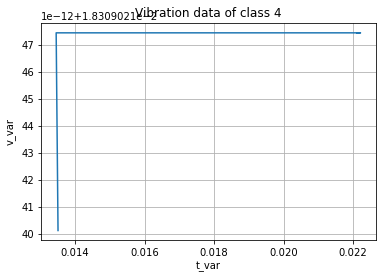

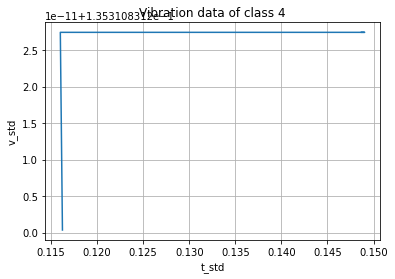

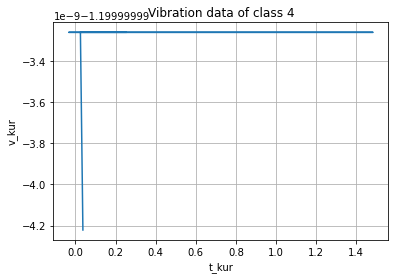

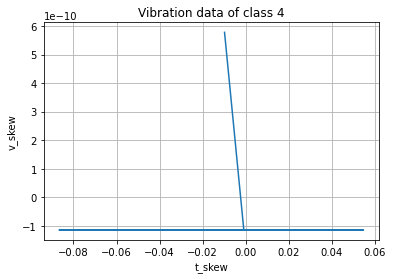

In [66]:
for i in range(0,len(cols)-1,2):
#     print(cols[i],cols[i+1])
    t = df4[cols[i]]
    x = df4[cols[i+1]]
    plt.figure()
    plt.plot(t, x)
    plt.xlabel(cols[i+1])
    plt.ylabel(cols[i])
    plt.title("Vibration data of class 4")
    plt.grid()

# for class 5

In [67]:
df5  = pd.read_csv('1200rpm_5.csv')
df5.head()

,Unnamed: 0,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,0,-0.442411,0.000039,0.420299,0.468711,0.013471,0.234375,0.015305,0.234375,0.012791,0.018309,0.113097,0.135311,0.081766,-1.2,-0.027600,5.783297e-10,5
1,1,-0.427178,0.468789,0.463262,0.937461,0.013222,0.703125,0.013519,0.703125,0.013359,0.018309,0.115580,0.135311,0.082733,-1.2,-0.039884,-1.142886e-10,5
2,2,-0.413611,0.937539,0.457073,1.406211,0.012694,1.171875,0.013222,1.171875,0.013265,0.018309,0.115176,0.135311,0.080966,-1.2,-0.008240,-1.142911e-10,5
3,3,-0.515008,1.406289,0.425476,1.874961,0.012743,1.640625,0.012746,1.640625,0.013603,0.018309,0.116630,0.135311,0.029802,-1.2,0.010963,-1.142811e-10,5
4,4,-0.522982,1.875039,0.528063,2.343711,0.012601,2.109375,0.011972,2.109375,0.013881,0.018309,0.117819,0.135311,0.163653,-1.2,0.031247,-1.142959e-10,5


In [68]:
df5 = df5.drop(['Unnamed: 0'],axis=1)
df5.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.442411,0.000039,0.420299,0.468711,0.013471,0.234375,0.015305,0.234375,0.012791,0.018309,0.113097,0.135311,0.081766,-1.2,-0.027600,5.783297e-10,5
1,-0.427178,0.468789,0.463262,0.937461,0.013222,0.703125,0.013519,0.703125,0.013359,0.018309,0.115580,0.135311,0.082733,-1.2,-0.039884,-1.142886e-10,5
2,-0.413611,0.937539,0.457073,1.406211,0.012694,1.171875,0.013222,1.171875,0.013265,0.018309,0.115176,0.135311,0.080966,-1.2,-0.008240,-1.142911e-10,5
3,-0.515008,1.406289,0.425476,1.874961,0.012743,1.640625,0.012746,1.640625,0.013603,0.018309,0.116630,0.135311,0.029802,-1.2,0.010963,-1.142811e-10,5
4,-0.522982,1.875039,0.528063,2.343711,0.012601,2.109375,0.011972,2.109375,0.013881,0.018309,0.117819,0.135311,0.163653,-1.2,0.031247,-1.142959e-10,5


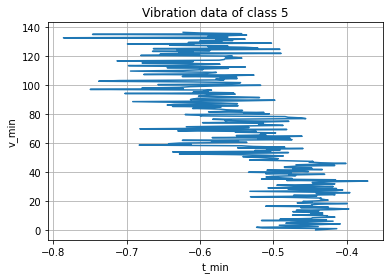

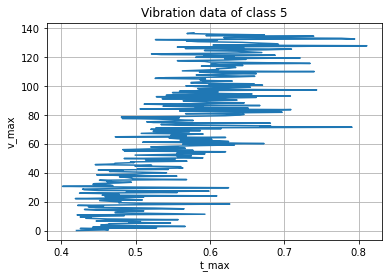

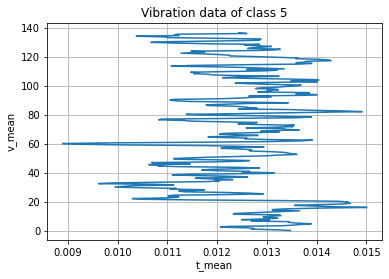

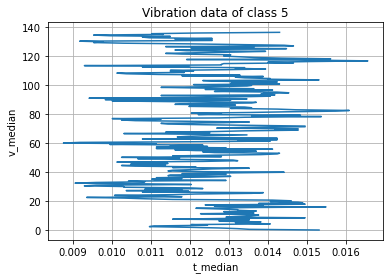

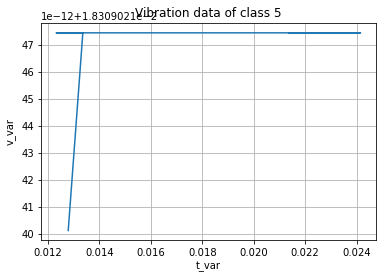

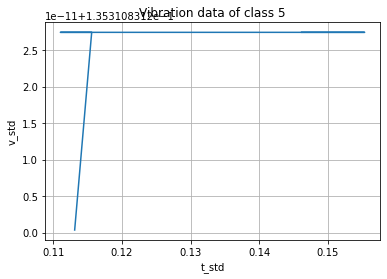

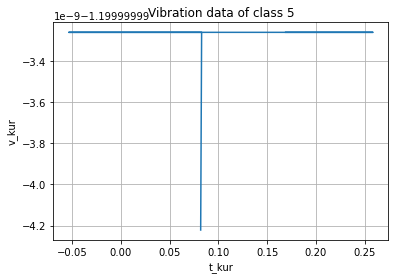

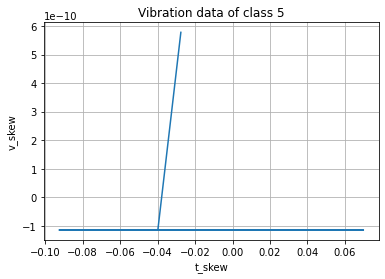

In [69]:
for i in range(0,len(cols)-1,2):
#     print(cols[i],cols[i+1])
    t = df5[cols[i]]
    x = df5[cols[i+1]]
    plt.figure()
    plt.plot(t, x)
    plt.xlabel(cols[i+1])
    plt.ylabel(cols[i])
    plt.title("Vibration data of class 5")
    plt.grid()

# for complete data

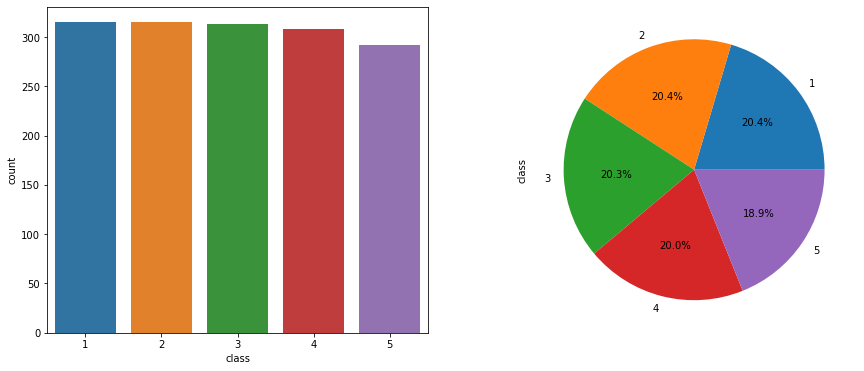

In [49]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='class', data=df, ax=ax[0])
_ = df['class'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

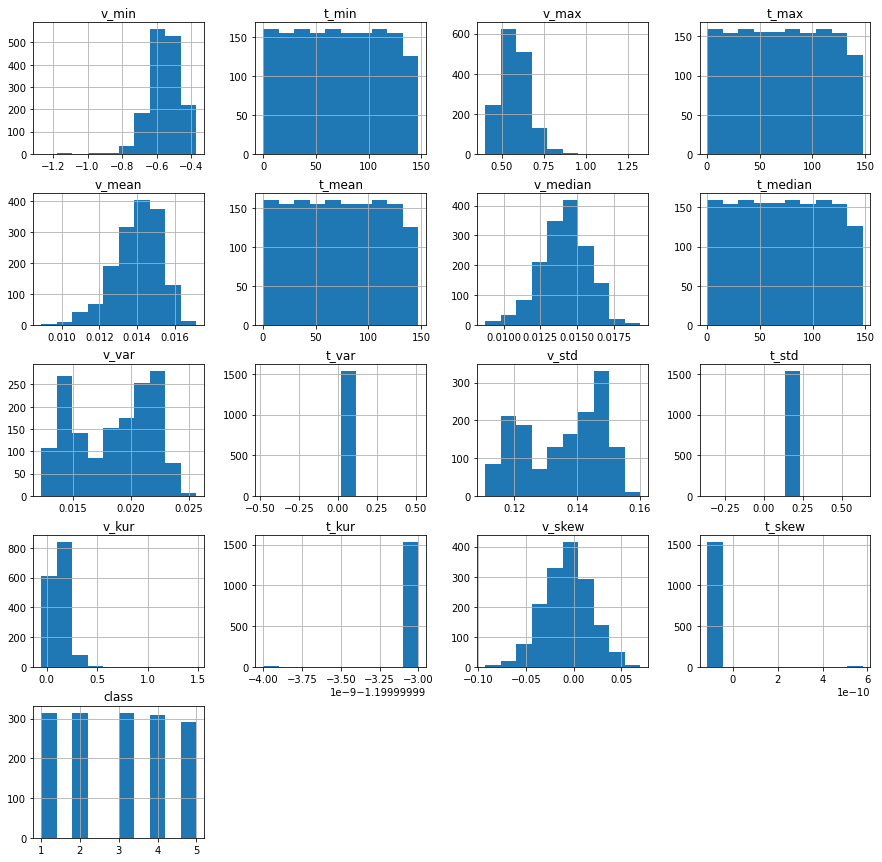

In [51]:
df.hist(figsize=(15,15))
plt.show()

In [55]:
def draw_univariate_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(30,35))

    counter=0
    
    for i in range(rows):
        for j in range(cols):

            if column_names[counter]=='class':
                break
            if 'violin' in plot_type:
                sns.violinplot(x='class', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                #sns.boxplot(x='target', y=column_names[counter],data=dataset, ax=axarr[i][j])
                sns.boxplot(x=None, y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter += 1
            if counter==(number_of_column-1,):
                break

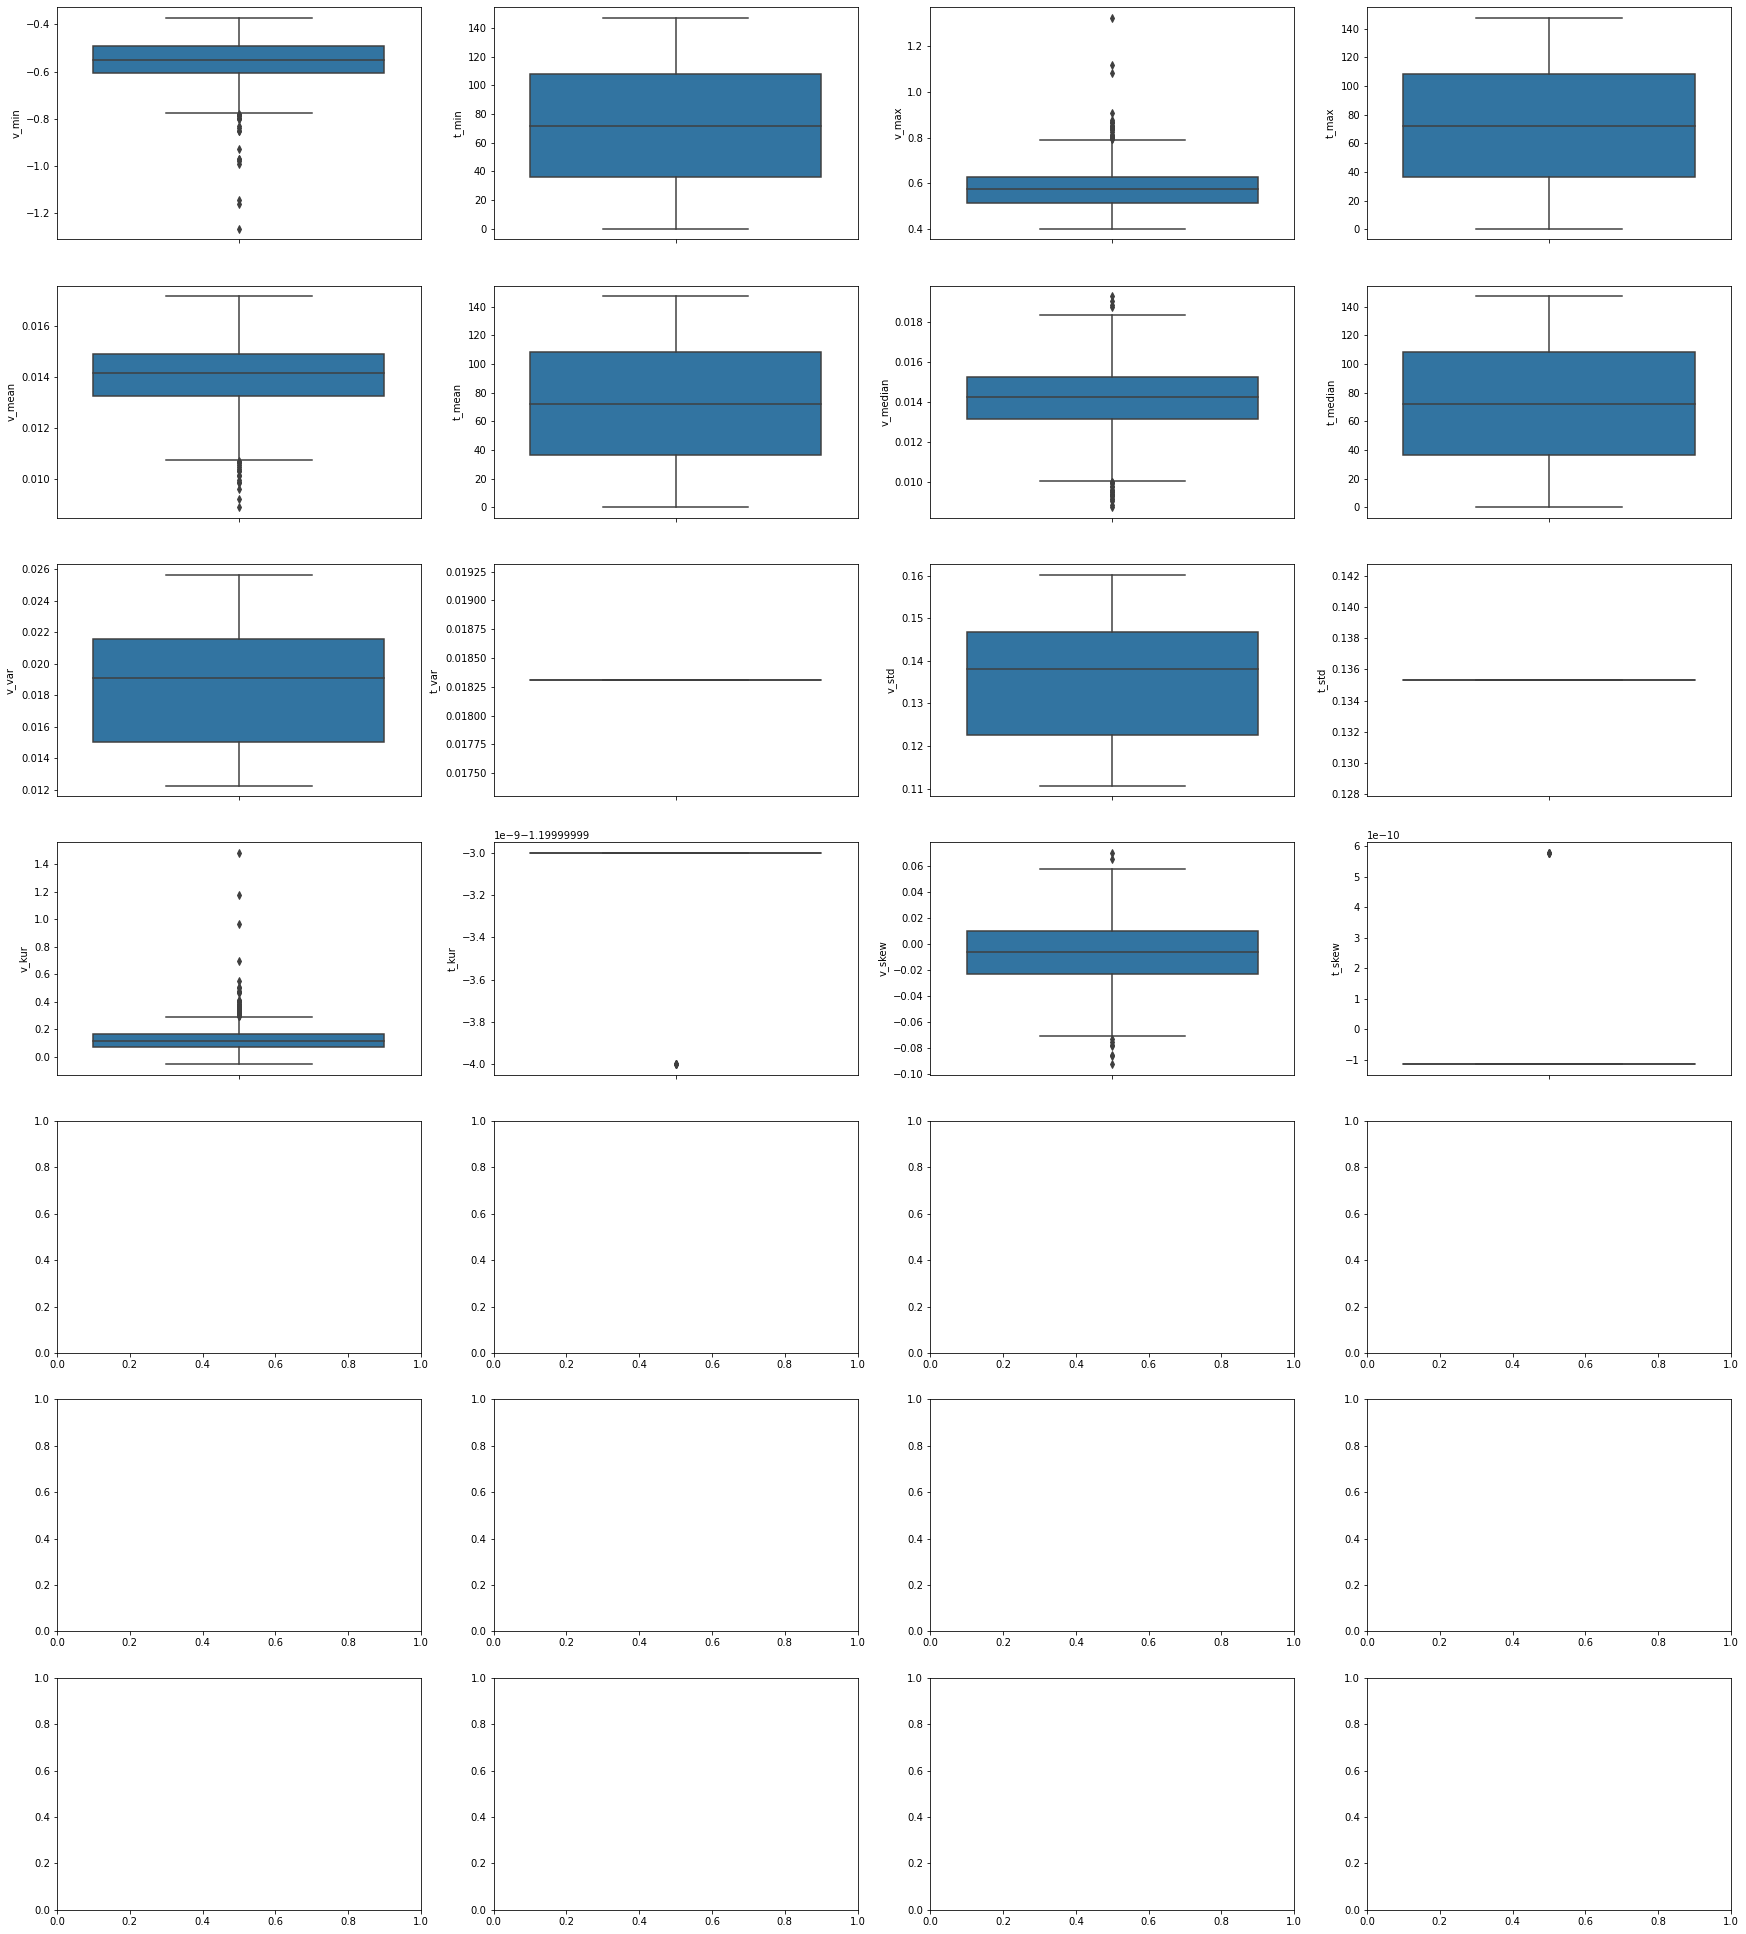

In [56]:
draw_univariate_plot(dataset=df, rows=7, cols=4,plot_type="box")

In [2]:
import pandas as pd
df = pd.read_csv('1200rpm.csv')
df.head()

,Sno,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,0,-0.514532,0.000039,0.679088,0.468711,0.014596,0.234375,0.015186,0.234375,0.020994,0.018309,0.144892,0.135311,0.116586,-1.2,-0.023177,5.780000e-10,1
1,1,-0.551068,0.468789,0.555852,0.937461,0.014873,0.703125,0.014412,0.703125,0.020695,0.018309,0.143858,0.135311,0.063281,-1.2,-0.023856,-1.140000e-10,1
2,2,-0.591889,0.937539,0.628330,1.406211,0.016387,1.171875,0.016316,1.171875,0.020610,0.018309,0.143560,0.135311,0.095484,-1.2,-0.016565,-1.140000e-10,1
3,3,-0.521137,1.406289,0.615120,1.874961,0.016488,1.640625,0.016316,1.640625,0.019657,0.018309,0.140202,0.135311,0.140740,-1.2,0.000706,-1.140000e-10,1
4,4,-0.562612,1.875039,0.578881,2.343711,0.016652,2.109375,0.018339,2.109375,0.020883,0.018309,0.144509,0.135311,0.117727,-1.2,-0.018211,-1.140000e-10,1


In [3]:
df = df.drop(['Sno'],axis=1)
df.head()

,v_min,t_min,v_max,t_max,v_mean,t_mean,v_median,t_median,v_var,t_var,v_std,t_std,v_kur,t_kur,v_skew,t_skew,class
0,-0.514532,0.000039,0.679088,0.468711,0.014596,0.234375,0.015186,0.234375,0.020994,0.018309,0.144892,0.135311,0.116586,-1.2,-0.023177,5.780000e-10,1
1,-0.551068,0.468789,0.555852,0.937461,0.014873,0.703125,0.014412,0.703125,0.020695,0.018309,0.143858,0.135311,0.063281,-1.2,-0.023856,-1.140000e-10,1
2,-0.591889,0.937539,0.628330,1.406211,0.016387,1.171875,0.016316,1.171875,0.020610,0.018309,0.143560,0.135311,0.095484,-1.2,-0.016565,-1.140000e-10,1
3,-0.521137,1.406289,0.615120,1.874961,0.016488,1.640625,0.016316,1.640625,0.019657,0.018309,0.140202,0.135311,0.140740,-1.2,0.000706,-1.140000e-10,1
4,-0.562612,1.875039,0.578881,2.343711,0.016652,2.109375,0.018339,2.109375,0.020883,0.018309,0.144509,0.135311,0.117727,-1.2,-0.018211,-1.140000e-10,1


In [4]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [5]:
# load dataset
dataset = df.values
X = dataset[:,0:16].astype(float)
Y = dataset[:,16]
Y

array([1., 1., 1., ..., 5., 5., 5.])

In [6]:
X

array([[-5.14532000e-01,  3.91000000e-05,  6.79088000e-01, ...,
        -1.19999999e+00, -2.31765500e-02,  5.78000000e-10],
       [-5.51068000e-01,  4.68789000e-01,  5.55852000e-01, ...,
        -1.19999999e+00, -2.38558600e-02, -1.14000000e-10],
       [-5.91889000e-01,  9.37539000e-01,  6.28330000e-01, ...,
        -1.19999999e+00, -1.65654640e-02, -1.14000000e-10],
       ...,
       [-5.43214000e-01,  1.35468789e+02,  6.07920000e-01, ...,
        -1.19999999e+00,  9.96117100e-03, -1.14000000e-10],
       [-5.98673000e-01,  1.35937539e+02,  5.69003000e-01, ...,
        -1.19999999e+00, -9.50415400e-03, -1.14000000e-10],
       [-6.23070000e-01,  1.36406289e+02,  5.78345000e-01, ...,
        -1.19999999e+00, -1.26912150e-02, -1.14000000e-10]])

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=16, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [81]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [85]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "D:\apps\Anaconda\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "D:\apps\Anaconda\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "D:\apps\Anacon

D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "D:\apps\Anaconda\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "D:\apps\Anaconda\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "D:\apps\Anacon

D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "D:\apps\Anaconda\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "D:\apps\Anaconda\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "D:\apps\Anacon

D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "D:\apps\Anaconda\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "D:\apps\Anaconda\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "D:\apps\Anacon

Baseline: nan% (nan%)


D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\apps\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 219, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "D:\apps\Anaconda\lib\site-packages\keras\wrappers\scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "D:\apps\Anaconda\lib\site-packages\keras\engine\training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "D:\apps\Anaconda\lib\site-packages\tensorflow\python\eager\def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "D:\apps\Anacon

In [8]:
from sklearn.preprocessing import MinMaxScaler

Y = df[['class']]
X = df.drop(['class',], axis=1)

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print(X)

[[0.84028894 0.         0.30072816 ... 0.         0.42732493 1.        ]
 [0.79954884 0.00318471 0.16719256 ... 1.         0.4231451  0.        ]
 [0.75403069 0.00636943 0.245728   ... 1.         0.46800334 0.        ]
 ...
 [0.80830658 0.92038217 0.22361221 ... 1.         0.63122329 0.        ]
 [0.74646607 0.92356688 0.18144267 ... 1.         0.511452   0.        ]
 [0.71926178 0.92675159 0.19156544 ... 1.         0.49184182 0.        ]]


      class
0         1
1         1
2         1
3         1
4         1
...     ...
1538      5
1539      5
1540      5
1541      5
1542      5

[1543 rows x 1 columns]


In [9]:
# load dataset
dataset = df.values
Y = dataset[:,16]
Y

array([1., 1., 1., ..., 5., 5., 5.])

In [10]:
X

array([[0.84028894, 0.        , 0.30072816, ..., 0.        , 0.42732493,
        1.        ],
       [0.79954884, 0.00318471, 0.16719256, ..., 1.        , 0.4231451 ,
        0.        ],
       [0.75403069, 0.00636943, 0.245728  , ..., 1.        , 0.46800334,
        0.        ],
       ...,
       [0.80830658, 0.92038217, 0.22361221, ..., 1.        , 0.63122329,
        0.        ],
       [0.74646607, 0.92356688, 0.18144267, ..., 1.        , 0.511452  ,
        0.        ],
       [0.71926178, 0.92675159, 0.19156544, ..., 1.        , 0.49184182,
        0.        ]])

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
Y

array([1., 1., 1., ..., 5., 5., 5.])

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)
# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(X_train,y_train)
cross_val_score(neigh, X_train, y_train, cv=6)

array([0.7283237 , 0.74418605, 0.84302326, 0.75      , 0.73255814,
       0.77325581])

In [14]:
y_pred = neigh.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[80, 15,  0,  0,  0],
       [19, 87,  1,  7,  4],
       [ 0,  3, 76,  4,  3],
       [ 0, 29, 13, 61, 10],
       [ 0,  8,  2,  3, 85]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

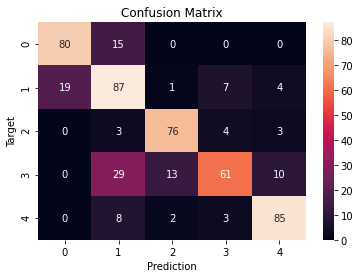

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sb.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [17]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7627450980392156


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
cross_val_score(clf, X_train, y_train, cv=6)

array([0.78612717, 0.71511628, 0.77906977, 0.72674419, 0.76744186,
       0.73255814])

In [42]:
y_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[82, 11,  0,  1,  1],
       [14, 75,  2, 23,  4],
       [ 0,  2, 74,  5,  5],
       [ 2, 14, 10, 79,  8],
       [ 3,  5,  2, 18, 70]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

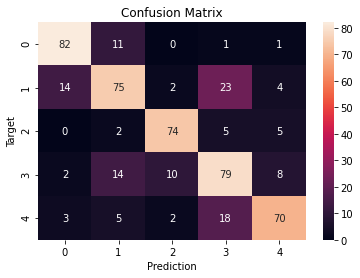

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sb.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [45]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7450980392156863


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84        95
         2.0       0.70      0.64      0.67       118
         3.0       0.84      0.86      0.85        86
         4.0       0.63      0.70      0.66       113
         5.0       0.80      0.71      0.75        98

    accuracy                           0.75       510
   macro avg       0.76      0.75      0.75       510
weighted avg       0.75      0.75      0.74       510



## Decision Tree using Gini Index

In [37]:
# not splitting into training and testing 

tree = DecisionTreeClassifier(criterion = 'gini')
#4 levels of splitting will occur
#bec we are not leeting the tree to construct to grow till the max effic there is is recution in accuracy
#tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
#minimum 50 samples are required to split the tree
#tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 50)
#how many samples tree need to have to split
#tree = DecisionTreeClassifier(criterion='entropy',min_samples_split = 10)
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = tree.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

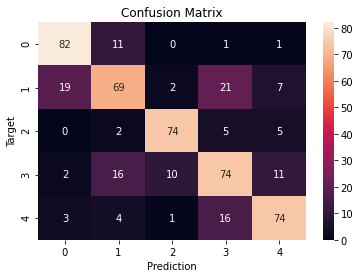

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sb.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [40]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7313725490196078


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84        95
         2.0       0.70      0.64      0.67       118
         3.0       0.84      0.86      0.85        86
         4.0       0.63      0.70      0.66       113
         5.0       0.80      0.71      0.75        98

    accuracy                           0.75       510
   macro avg       0.76      0.75      0.75       510
weighted avg       0.75      0.75      0.74       510

